In [0]:
!mkdir ~/.kaggle

In [2]:
ls

sample_data/


In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 345M/346M [00:07<00:00, 42.9MB/s]
100% 346M/346M [00:07<00:00, 47.1MB/s]


In [6]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating: seg_train/seg_train/mountain/7695.jp

In [7]:
ls

intel-image-classification.zip  sample_data/  seg_test/
kaggle.json                     seg_pred/     seg_train/


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
train_dir = "seg_train/seg_train/"
val_dir = "seg_test/seg_test"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=64,
                                                   target_size = (150,150),class_mode="sparse")

val_generator = val_datagen.flow_from_directory(val_dir, batch_size = 64, target_size = (150,150), class_mode = "sparse")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Custom Model

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, input_shape = (150,150,3), kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(6, "softmax")
])

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-5, momentum=0.99)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10**(epochs * 0.6))
optimizer = tf.keras.optimizers.SGD(learning_rate = 2e-6, momentum=0.99)
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])

In [13]:
history = model.fit(train_generator, epochs = 10,validation_data=val_generator, callbacks = [lr_schedule], verbose = 2,steps_per_epoch=200, validation_steps=200 )

Epoch 1/10
200/200 - 37s - loss: 1.8037 - acc: 0.1622 - val_loss: 1.7855 - val_acc: 0.1721 - lr: 1.0000e-08
Epoch 2/10
200/200 - 37s - loss: 1.7962 - acc: 0.1690 - val_loss: 1.7768 - val_acc: 0.1985 - lr: 3.9811e-08
Epoch 3/10
200/200 - 36s - loss: 1.7862 - acc: 0.1741 - val_loss: 1.7560 - val_acc: 0.2477 - lr: 1.5849e-07
Epoch 4/10
200/200 - 36s - loss: 1.7493 - acc: 0.2194 - val_loss: 1.6893 - val_acc: 0.3110 - lr: 6.3096e-07
Epoch 5/10
200/200 - 36s - loss: 1.6136 - acc: 0.3409 - val_loss: 1.4784 - val_acc: 0.4549 - lr: 2.5119e-06
Epoch 6/10
200/200 - 36s - loss: 1.3653 - acc: 0.4737 - val_loss: 1.2753 - val_acc: 0.5271 - lr: 1.0000e-05
Epoch 7/10
200/200 - 36s - loss: 1.2038 - acc: 0.5400 - val_loss: 1.2250 - val_acc: 0.5364 - lr: 3.9811e-05
Epoch 8/10
200/200 - 36s - loss: 1.1064 - acc: 0.5805 - val_loss: 1.1360 - val_acc: 0.5656 - lr: 1.5849e-04
Epoch 9/10
200/200 - 36s - loss: 1.1141 - acc: 0.5804 - val_loss: 1.3607 - val_acc: 0.5042 - lr: 6.3096e-04
Epoch 10/10
200/200 - 36s - 

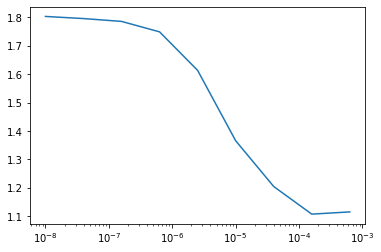

In [21]:
x = 1e-8 * 10**(np.arange(10) * 0.6)  
y = history.history['loss']
plt.semilogx(x,y)

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-4, momentum=0.99)
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])

In [23]:
history = model.fit(train_generator, epochs = 30,validation_data=val_generator, verbose = 1,steps_per_epoch=150, validation_steps=150 )

Epoch 1/30
150/150 [==============================] - 28s 184ms/step - loss: 1.4467 - acc: 0.4228 - val_loss: 1.2866 - val_acc: 0.5136
Epoch 2/30
150/150 [==============================] - 28s 185ms/step - loss: 1.2273 - acc: 0.5358 - val_loss: 1.2018 - val_acc: 0.5452
Epoch 3/30
150/150 [==============================] - 28s 184ms/step - loss: 1.1365 - acc: 0.5704 - val_loss: 1.1682 - val_acc: 0.5574
Epoch 4/30
150/150 [==============================] - 28s 185ms/step - loss: 1.0910 - acc: 0.5798 - val_loss: 1.1341 - val_acc: 0.5673
Epoch 5/30
150/150 [==============================] - 28s 185ms/step - loss: 1.0052 - acc: 0.6192 - val_loss: 1.1145 - val_acc: 0.5847
Epoch 6/30
150/150 [==============================] - 28s 185ms/step - loss: 0.9622 - acc: 0.6395 - val_loss: 1.1012 - val_acc: 0.5855
Epoch 7/30
150/150 [==============================] - 28s 185ms/step - loss: 0.8971 - acc: 0.6742 - val_loss: 1.1305 - val_acc: 0.5822
Epoch 8/30
150/150 [==============================] - 2

KeyboardInterrupt: ignored

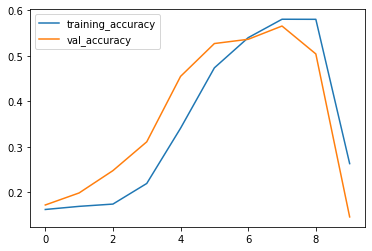

In [24]:

plt.plot(history.history['acc'], label = "training_accuracy")
plt.plot(history.history['val_acc'], label = "val_accuracy")
plt.legend()

# MobNet V2

In [0]:
tf.keras.backend.clear_session()

In [26]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (150,150,3), include_top=False, weights='imagenet', )

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = False

In [28]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [0]:
prediction_layer = tf.keras.layers.Dense(6, "softmax")

In [0]:
model = tf.keras.models.Sequential([
                                    base_model,
                                    global_average_layer,
                                    prediction_layer
])

In [0]:
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])


In [33]:
len(model.trainable_variables)

2

In [34]:
history = model.fit(train_generator, epochs = 20,validation_data=val_generator, verbose = 2,steps_per_epoch=100, validation_steps=100 )

Epoch 1/20
100/100 - 14s - loss: 1.2429 - acc: 0.5291 - val_loss: 0.4632 - val_acc: 0.8312
Epoch 2/20
100/100 - 14s - loss: 0.3878 - acc: 0.8645 - val_loss: 0.3732 - val_acc: 0.8690
Epoch 3/20
100/100 - 14s - loss: 0.3528 - acc: 0.8759 - val_loss: 0.3453 - val_acc: 0.8842
Epoch 4/20
100/100 - 14s - loss: 0.3341 - acc: 0.8872 - val_loss: 0.3404 - val_acc: 0.8791
Epoch 5/20
100/100 - 14s - loss: 0.3170 - acc: 0.8927 - val_loss: 0.3417 - val_acc: 0.8758
Epoch 6/20
100/100 - 14s - loss: 0.3126 - acc: 0.8900 - val_loss: 0.3120 - val_acc: 0.8880
Epoch 7/20
100/100 - 14s - loss: 0.2825 - acc: 0.8995 - val_loss: 0.3026 - val_acc: 0.8891
Epoch 8/20
100/100 - 14s - loss: 0.2764 - acc: 0.9026 - val_loss: 0.2988 - val_acc: 0.8910
Epoch 9/20
100/100 - 14s - loss: 0.2585 - acc: 0.9108 - val_loss: 0.2901 - val_acc: 0.8938
Epoch 10/20
100/100 - 14s - loss: 0.2774 - acc: 0.9027 - val_loss: 0.2893 - val_acc: 0.8954
Epoch 11/20
100/100 - 14s - loss: 0.2544 - acc: 0.9116 - val_loss: 0.2862 - val_acc: 0.89

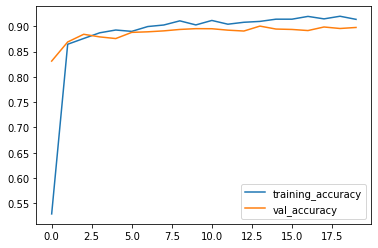

In [35]:
  #batch_size = 256
plt.plot(history.history['acc'], label = "training_accuracy")
plt.plot(history.history['val_acc'], label = "val_accuracy")
plt.legend()

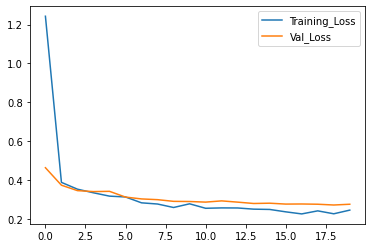

In [36]:
plt.plot(history.history['loss'], label = "Training_Loss")
plt.plot(history.history['val_loss'], label = "Val_Loss")
plt.legend()